In [178]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Change the directory to the folder in which your dataset is

In [3]:
#os.chdir("D:\Klaptor\Python\data science\Pandas\Dataset")
os.chdir("/Users/user/Desktop/python_stuff/ML/Pandas/Dataset")

In [4]:
os.listdir()

['Toyota.csv.txt']

## Initial import to see the dataset 

In [5]:
df_1 = pd.read_csv('Toyota.csv.txt')

In [6]:
df_1.head()

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170


#### Remove Unnamed: 0 column

In [7]:
# To remove the Unnamed:0 column use index_col=0

df_2 = pd.read_csv('Toyota.csv.txt', index_col = 0)

In [8]:
df_2.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170


In [ ]:
# make a deep copy of df
# data = df.copy(deep=True)

In [9]:
df_2.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

## Helpful lookups commands

In [19]:
# label based lookup
print('.at: ', df_2.at[3, 'Age'])

# integer based lookup
print('.iat : ', df_2.iat[3,1])

# selected values of a label
print('.loc :\n', df_2.loc[1:5, 'FuelType'])

.at:  26.0
.iat :  26.0
.loc:
 1    Diesel
2    Diesel
3    Diesel
4    Diesel
5    Diesel
Name: FuelType, dtype: object


## Find out data types of each columns

In [20]:
df_2.dtypes

Price          int64
Age          float64
KM            object
FuelType      object
HP            object
MetColor     float64
Automatic      int64
CC             int64
Doors         object
Weight         int64
dtype: object

#### Include of exclude any data type

In [22]:
# select columns of a particular data type

df_2.select_dtypes(include=[], exclude=['object']).head()

,Price,Age,MetColor,Automatic,CC,Weight
0,13500,23.0,1.0,0,2000,1165
1,13750,23.0,1.0,0,2000,1165
2,13950,24.0,NaN,0,2000,1165
3,14950,26.0,0.0,0,2000,1165
4,13750,30.0,0.0,0,2000,1170


In [23]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 10 columns):
Price        1436 non-null int64
Age          1336 non-null float64
KM           1436 non-null object
FuelType     1336 non-null object
HP           1436 non-null object
MetColor     1286 non-null float64
Automatic    1436 non-null int64
CC           1436 non-null int64
Doors        1436 non-null object
Weight       1436 non-null int64
dtypes: float64(2), int64(4), object(4)
memory usage: 163.4+ KB


## To find out if there are any NaN values, string where it should be integer/float, some weird symbols such as '?' etc

In [72]:
# Replace "Price" with the column names to find out any weird characters that need to be addressed

weird_characters = np.unique(df_2['Doors'])
print(weird_characters)    

['2' '3' '4' '5' 'five' 'four' 'three']


### If you try to check anomaly in 'FuelType' column, it will show the following error
### TypeError: '<' not supported between instances of 'float' and 'str'

### To solve this error use pandas .unique() function

In [59]:
df_2['FuelType'].unique()

array(['Diesel', nan, 'Petrol', 'CNG'], dtype=object)

Age, FuelType, MetColor has **_Nan_**

KM has **_??_**

HP has **_????_**

Doors has **_int_** and **_string_** --> convert strings into int



### One way to get rid of all the weird values is to replace them with NaN

#### Final import of dataset

In [64]:
# Convert all the weird values into NaN values
# Make deep copy of the dataset so that the imported dataset will be unaffected of the changes we do in its deep copy.

data_nan = pd.read_csv('Toyota.csv.txt', index_col = 0, na_values = ["??", "????"])
df = data_nan.copy(deep=True)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 10 columns):
Price        1436 non-null int64
Age          1336 non-null float64
KM           1421 non-null float64
FuelType     1336 non-null object
HP           1430 non-null float64
MetColor     1286 non-null float64
Automatic    1436 non-null int64
CC           1436 non-null int64
Doors        1436 non-null object
Weight       1436 non-null int64
dtypes: float64(4), int64(4), object(2)
memory usage: 123.4+ KB


#### To replace string values in the *Door* column

In [69]:
df['Doors'].replace("five", 5, inplace=True)
df['Doors'].replace("four", 4, inplace=True)
df["Doors"].replace("three", 3, inplace=True)

#### Convert Doors datatype to int64

In [76]:
# Convert Doors type from object to int64

df["Doors"] = df["Doors"].astype('int64')

In [78]:
np.unique(df['Doors'])

array([2, 3, 4, 5])

## all the columns with total number of Null values 

In [80]:
df.isnull().sum()

Price          0
Age          100
KM            15
FuelType     100
HP             6
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

In [ ]:
#print(data_nan["Price"].min())

#print(data_nan["Price"].max())

### Pandas column data manipulation
### Make a new column named Price_class which will have three price segments: Low, Medium, High

In [81]:
df.insert(10, "Price_class", "")

In [82]:
for i in range(0, len(df["Price"])):
    if (df["Price"][i]<=8000):
        df["Price_class"][i]='Low'
    elif (df["Price"][i]>18000):
        df["Price_class"][i]='High'
    else:
        df["Price_class"][i]='Medium'

In [88]:
df["Price_class"].value_counts()

Medium    1042
Low        304
High        90
Name: Price_class, dtype: int64

In [84]:
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Price_class
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,3,1165,Medium
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165,Medium
2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165,Medium
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165,Medium
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170,Medium


## Some more column manipulation

### Make two more columns to show KM/month and Age(years) data

In [89]:
# df.insert(loc, col_name, value)
df.insert(11,"KM_per_month", 0)
df.insert(12, 'Age_in_years', 0)

In [ ]:
# drop columns from 12 to 14
# df.drop(df.iloc[:, 12:14], inplace=True, axis=1)

In [90]:
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Price_class,KM_per_month,Age_in_years
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,3,1165,Medium,0,0
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165,Medium,0,0
2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165,Medium,0,0
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165,Medium,0,0
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170,Medium,0,0


In [91]:
def conversion(age, km):
    km_per_month = km/age
    age_in_year = age/12
    return [km_per_month, age_in_year]

In [92]:
df['KM_per_month'], df['Age_in_years'] = conversion(df['Age'], df['KM'])

In [93]:
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Price_class,KM_per_month,Age_in_years
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,3,1165,Medium,2042.869565,1.916667
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165,Medium,3171.173913,1.916667
2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165,Medium,1737.958333,2.000000
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165,Medium,1846.153846,2.166667
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170,Medium,1283.333333,2.500000


In [96]:
df.sort_values(["KM", "FuelType"], ascending=[1, 1]).head() # ascending = 1 means ascending = True

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Price_class,KM_per_month,Age_in_years
601,7500,50.0,1.0,Diesel,90.0,1.0,0,2000,3,1260,Low,0.020000,4.166667
117,17900,NaN,1.0,Petrol,110.0,1.0,0,1600,3,1105,Medium,NaN,NaN
169,17795,9.0,1.0,Petrol,98.0,1.0,0,1400,4,1065,Medium,0.111111,0.750000
170,18245,9.0,1.0,Petrol,110.0,1.0,0,1600,5,1075,High,0.111111,0.750000
184,17795,1.0,1.0,Petrol,98.0,1.0,0,1400,4,1100,Medium,1.000000,0.083333


## Groupby

In [97]:
df['count'] = 1

In [98]:
df.groupby(["FuelType", "HP"]).count()["count"]

FuelType  HP   
CNG       110.0     15
Diesel    69.0      31
          72.0      69
          73.0       1
          90.0      31
          110.0      2
          116.0      7
Petrol    71.0       1
          86.0     226
          97.0     154
          98.0       2
          107.0     21
          110.0    760
          116.0      1
          192.0     10
Name: count, dtype: int64

# Exploratory Data Analysis

### cross table

In [99]:
df['FuelType'].value_counts()

Petrol    1177
Diesel     144
CNG         15
Name: FuelType, dtype: int64

In [100]:
# crosstable on single column
pd.crosstab(index=df['FuelType'], columns='count', dropna=True)

col_0,count
FuelType,
CNG,15
Diesel,144
Petrol,1177


In [101]:
# crosstable on two columns
pd.crosstab(index = df['Automatic'],
             columns = df['Price_class'],
             dropna=True)

Price_class,High,Low,Medium
Automatic,,,
0,82,297,977
1,8,7,65


### two way table - joint probability

In [102]:
pd.crosstab(index = df["Automatic"],
            columns = df["Price_class"],
            normalize=True,
            dropna=True)

Price_class,High,Low,Medium
Automatic,,,
0,0.057103,0.206825,0.680362
1,0.005571,0.004875,0.045265


### two way table - marginal probability

In [103]:
pd.crosstab(index = df["Automatic"],
            columns = df["Price_class"],
            margins=True,
            normalize=True,
            dropna=True)

Price_class,High,Low,Medium,All
Automatic,,,,
0,0.057103,0.206825,0.680362,0.94429
1,0.005571,0.004875,0.045265,0.05571
All,0.062674,0.211699,0.725627,1.00000


### two way table - conditional probability

In [104]:
pd.crosstab(index = df["Automatic"],
            columns = df["Price_class"],
            margins=True,
            normalize='index',
            dropna=True)

Price_class,High,Low,Medium
Automatic,,,
0,0.060472,0.219027,0.720501
1,0.100000,0.087500,0.812500
All,0.062674,0.211699,0.725627


In [105]:
pd.crosstab(index = df["Automatic"],
            columns = df["Price_class"],
            margins=True,
            normalize='columns',
            dropna=True)

Price_class,High,Low,Medium,All
Automatic,,,,
0,0.911111,0.976974,0.93762,0.94429
1,0.088889,0.023026,0.06238,0.05571


# Correlation between two numerical variables

### We need to keep only int64 and float64 variables in the table, remove all the object data types

In [106]:
numerical_df = df.select_dtypes(exclude="object")
numerical_df = numerical_df.drop(columns = 'count')

In [107]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 11 columns):
Price           1436 non-null int64
Age             1336 non-null float64
KM              1421 non-null float64
HP              1430 non-null float64
MetColor        1286 non-null float64
Automatic       1436 non-null int64
CC              1436 non-null int64
Doors           1436 non-null int64
Weight          1436 non-null int64
KM_per_month    1321 non-null float64
Age_in_years    1336 non-null float64
dtypes: float64(6), int64(5)
memory usage: 174.6 KB


In [108]:
corr = numerical_df.corr()

In [109]:
corr

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,KM_per_month,Age_in_years
Price,1.000000,-0.878407,-0.574720,0.309902,0.112041,0.033081,0.165067,0.185326,0.581198,-0.038704,-0.878407
Age,-0.878407,1.000000,0.512735,-0.157904,-0.099659,0.032573,-0.120706,-0.157027,-0.464299,-0.114745,1.000000
KM,-0.574720,0.512735,1.000000,-0.335285,-0.093825,-0.081248,0.299993,-0.036191,-0.026271,0.729894,0.512735
HP,0.309902,-0.157904,-0.335285,1.000000,0.064749,0.013755,0.053758,0.097162,0.086737,-0.273574,-0.157904
MetColor,0.112041,-0.099659,-0.093825,0.064749,1.000000,-0.013973,0.029189,0.086203,0.057142,-0.043703,-0.099659
Automatic,0.033081,0.032573,-0.081248,0.013755,-0.013973,1.000000,-0.069321,-0.027654,0.057249,-0.090767,0.032573
CC,0.165067,-0.120706,0.299993,0.053758,0.029189,-0.069321,1.000000,0.126768,0.651450,0.433470,-0.120706
Doors,0.185326,-0.157027,-0.036191,0.097162,0.086203,-0.027654,0.126768,1.000000,0.302618,0.041161,-0.157027
Weight,0.581198,-0.464299,-0.026271,0.086737,0.057142,0.057249,0.651450,0.302618,1.000000,0.330868,-0.464299
KM_per_month,-0.038704,-0.114745,0.729894,-0.273574,-0.043703,-0.090767,0.433470,0.041161,0.330868,1.000000,-0.114745


## Findings

- Correlation between *Age* and *Price* is **-0.878** which means Age and Price of the car are **negatively correlated**. The Age of the car increases, price decreases and the low age(small age) cars have high price.

- Correlation between *Weight* and *Price* is **0.58** which means  Weight and Price of the car are **positively correlated**. More the price, greater the weight of the car and vice versa.

- Correlation between *Weight* and *CC* is **0.65** which means  Weight and CC of the car are **positively correlated**. More the Weight, greater the CC and vice versa.

# Plots

### Scatterplot

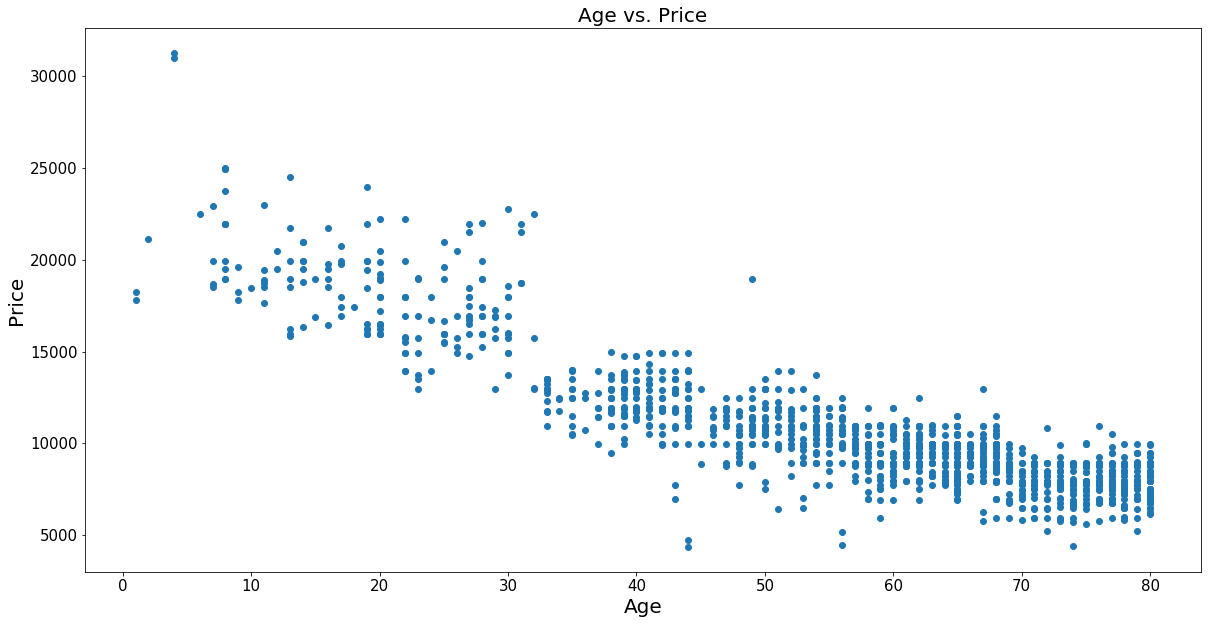

In [110]:
plt.figure(figsize=(20,10))
plt.scatter(df["Age"], df["Price"])
plt.title("Age vs. Price", fontsize=20)
plt.xlabel("Age", fontsize=20)
plt.ylabel("Price", fontsize=20)
plt.tick_params(axis='both', labelsize=15) # set tick font size
plt.show()

### Histogram

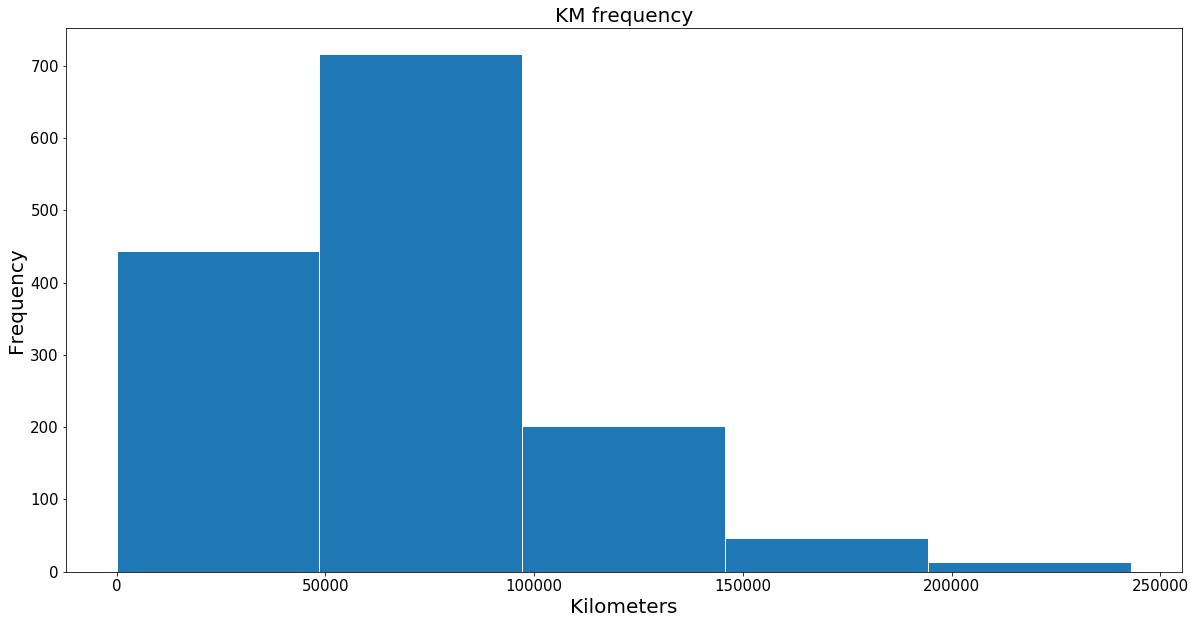

In [111]:
plt.figure(figsize=(20,10))
plt.hist(df["KM"], edgecolor='w', bins=5)
plt.title("KM frequency", fontsize=20)
plt.xlabel("Kilometers", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.show()

### Bar chart with missing values

In [162]:
fueltype = df['FuelType'].fillna('Missing')
count = fueltype.value_counts()
unique_fueltype = np.unique(fueltype)
index = np.arange(len(unique_fueltype))
xtick = ['Petrol', 'Diesel', 'Missing', 'CNG']

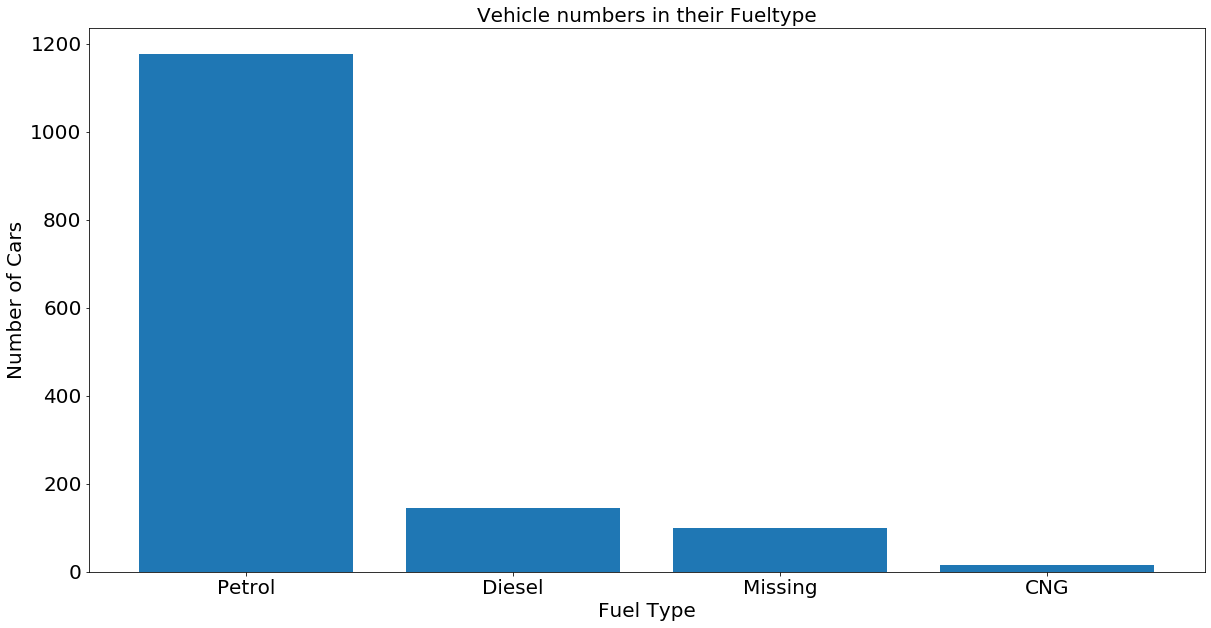

In [161]:
plt.figure(figsize=(20,10))
plt.bar(index, count)
plt.title('Vehicle numbers in their Fueltype', fontsize=20)
plt.xlabel('Fuel Type', fontsize=20)
plt.ylabel('Number of Cars', fontsize=20)
plt.tick_params(axis='both', labelsize=20)
plt.xticks(index, xtick)
plt.show()

## Bar chart without missing values

In [172]:
fueltype1 = df['FuelType'].dropna()
count1 = fueltype1.value_counts()
unique_fueltype1 = np.unique(fueltype1)
index1 = np.arange(len(unique_fueltype1))

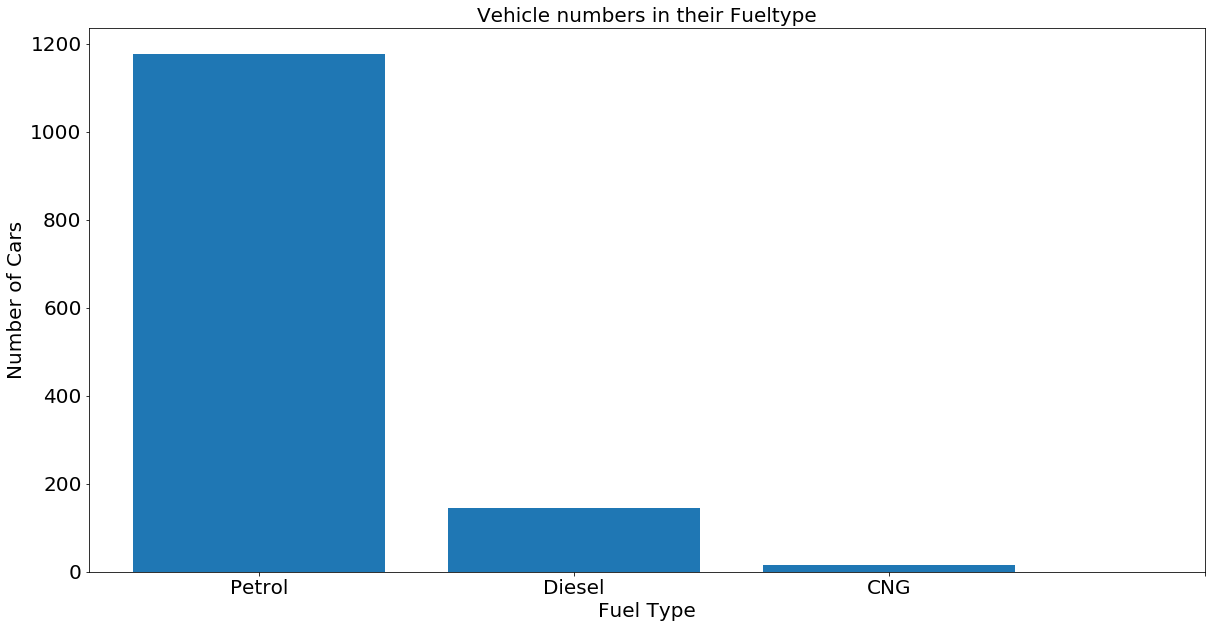

In [177]:
plt.figure(figsize=(20,10))
plt.bar(index1, count1)
plt.title('Vehicle numbers in their Fueltype', fontsize=20)
plt.xlabel('Fuel Type', fontsize=20)
plt.ylabel('Number of Cars', fontsize=20)
plt.tick_params(axis='both', labelsize=20)
plt.xticks(index, unique_fueltype1[::-1])
plt.show()

## Seaborn graphs

### Scatter plot

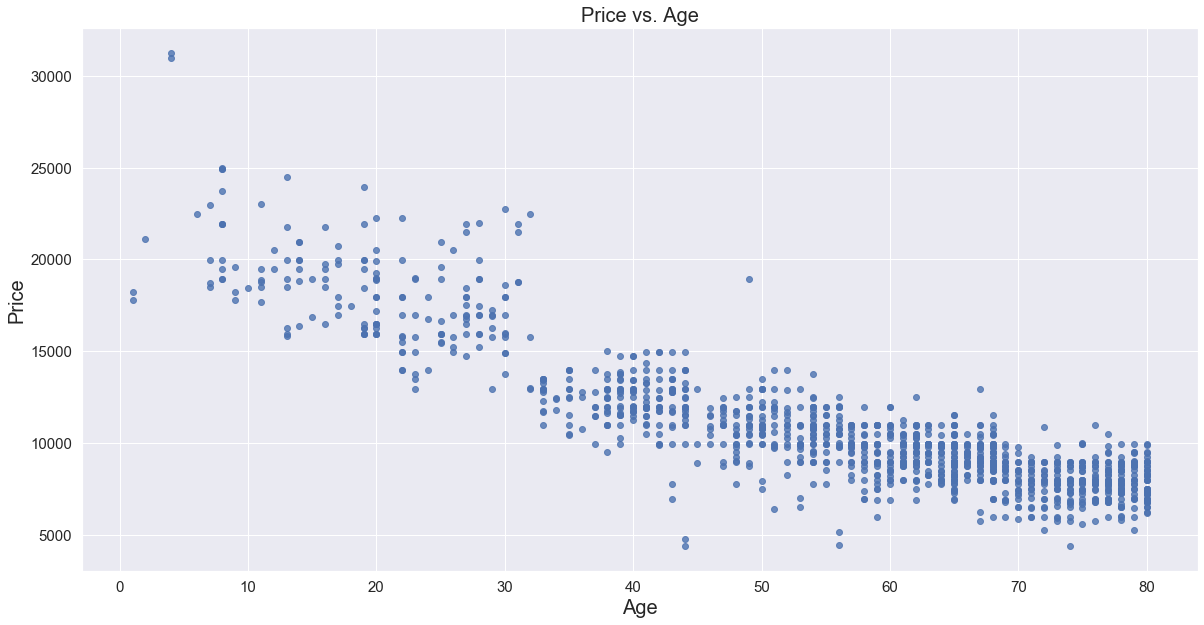

In [221]:
sns.set(style='darkgrid')
sns.set(rc={'figure.figsize':(20,10)})
sns.regplot(x=df['Age'],
            y=df['Price'],
            fit_reg=False)
plt.title('Price vs. Age', fontsize=20)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.tick_params(axis='both', labelsize=15)

### Grouped Scatter plot AKA lmplot

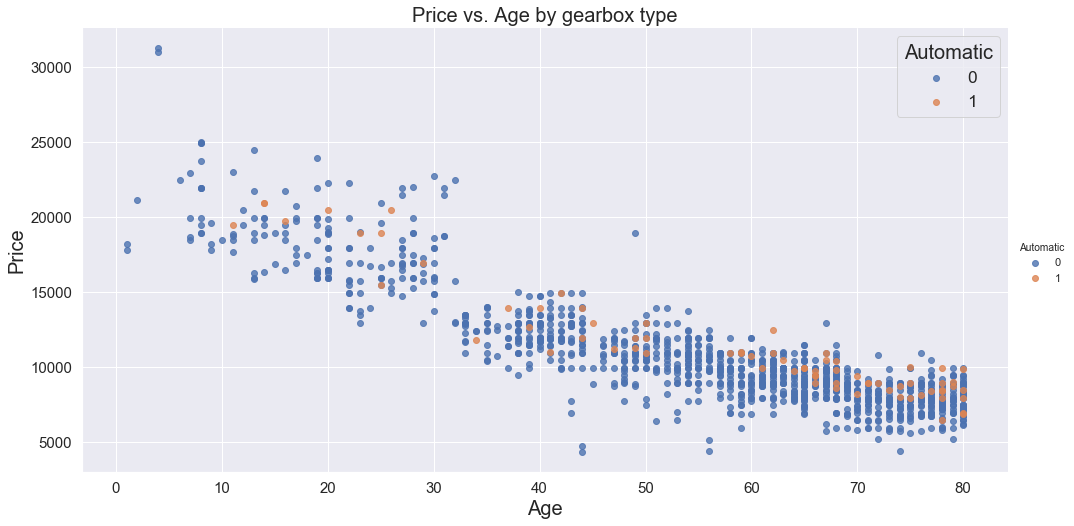

In [270]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(20,10)})
sns.lmplot(x='Age', y='Price', data=df,
           fit_reg=False,
           hue='Automatic',
           height=7,
           aspect=2)
plt.legend(title='Automatic', fontsize='x-large', title_fontsize='20')


plt.title('Price vs. Age by gearbox type', fontsize=20)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.tick_params(axis='both', labelsize=15)

## histogram

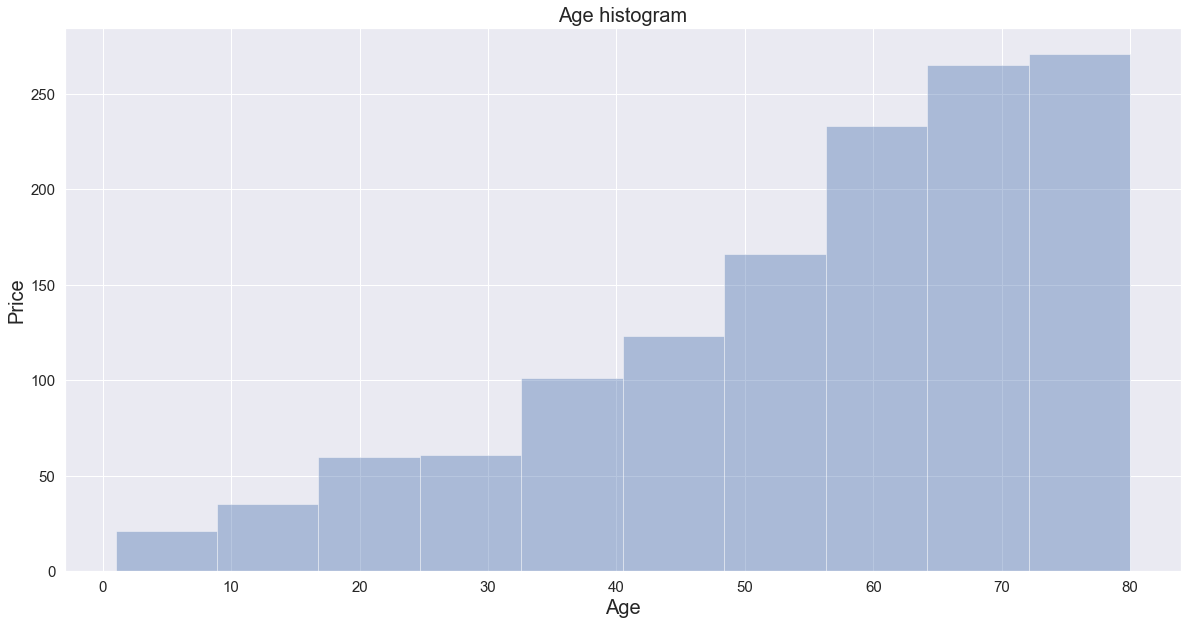

In [276]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(20,10)})
sns.distplot(df['Age'].dropna(), kde=False, bins=10)

plt.title('Age histogram', fontsize=20)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.tick_params(axis='both', labelsize=15)

## Bar chart

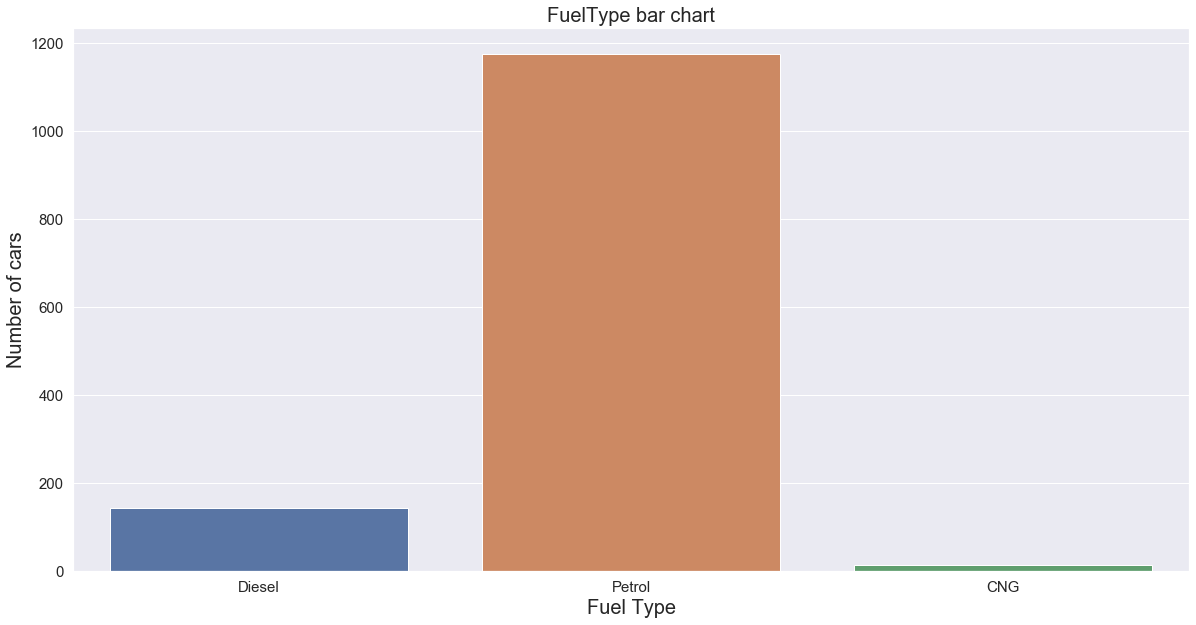

In [280]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(x='FuelType', data=df)

plt.title('FuelType bar chart', fontsize=20)
plt.xlabel('Fuel Type', fontsize=20)
plt.ylabel('Number of cars', fontsize=20)
plt.tick_params(axis='both', labelsize=15)

## Grouped bar plot

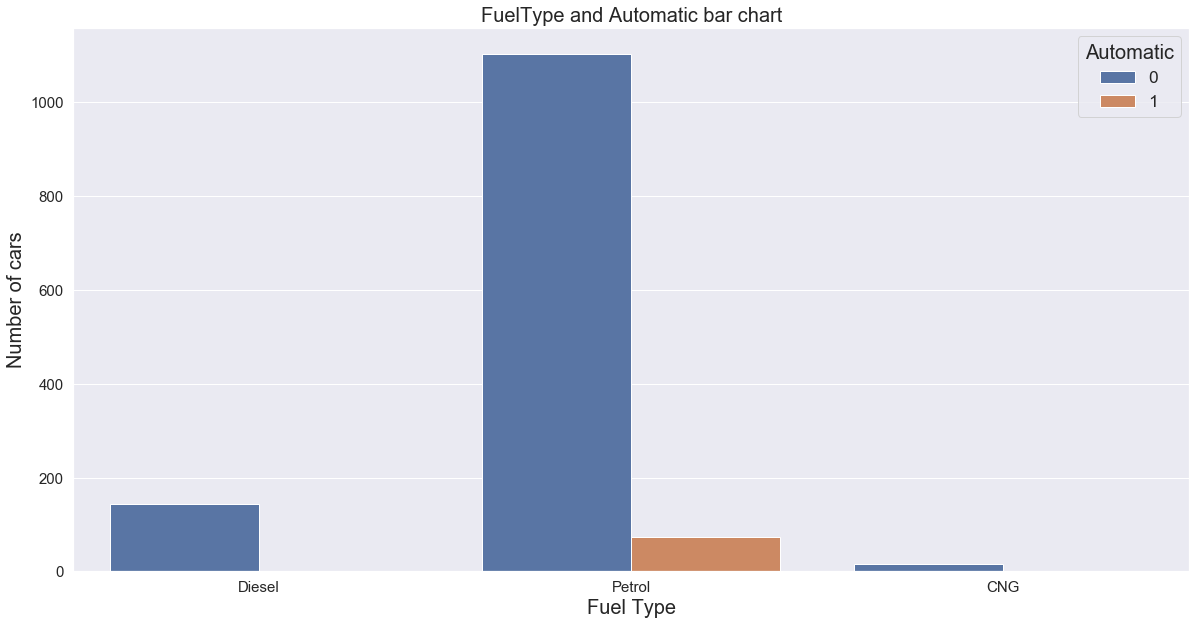

In [290]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(20,10)})

sns.countplot(x="FuelType", hue="Automatic", data=df)

plt.title('FuelType and Automatic bar chart', fontsize=20)
plt.xlabel('Fuel Type', fontsize=20)
plt.ylabel('Number of cars', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.legend(title='Automatic', fontsize='x-large', title_fontsize='20', loc=1)



## Box & Whisker plot

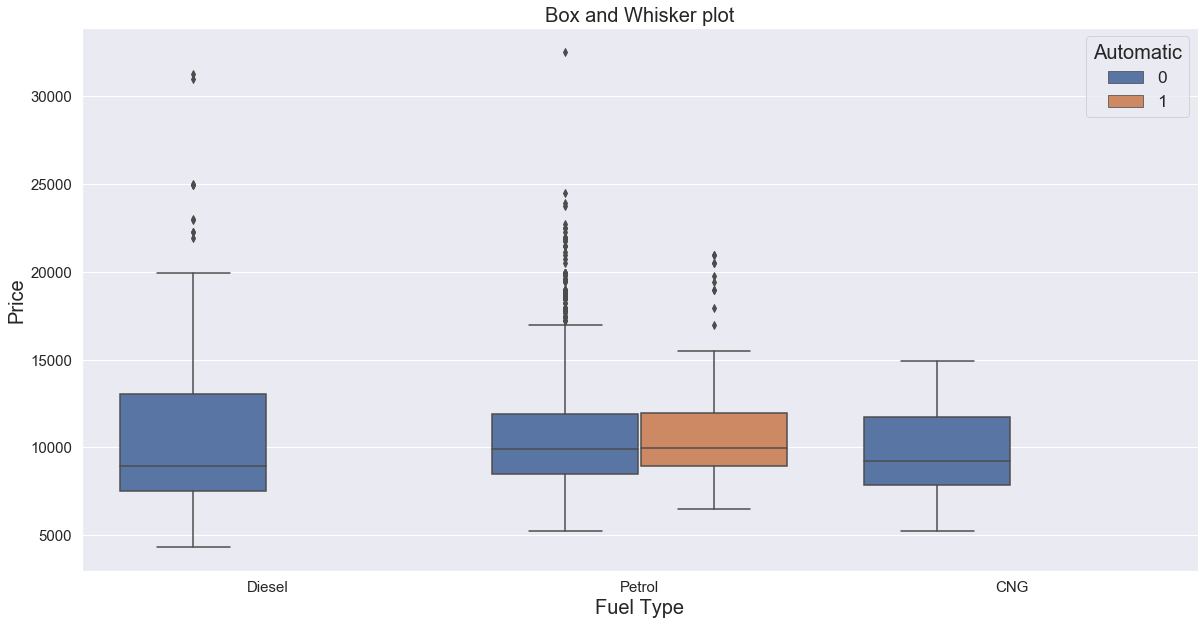

In [358]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(x="FuelType", y="Price", data=df, hue="Automatic")

plt.title('Box and Whisker plot', fontsize=20)
plt.xlabel('Fuel Type', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.legend(title='Automatic', fontsize='x-large', title_fontsize='20', loc=1)

## Box-Whisker and Bar plot in same window

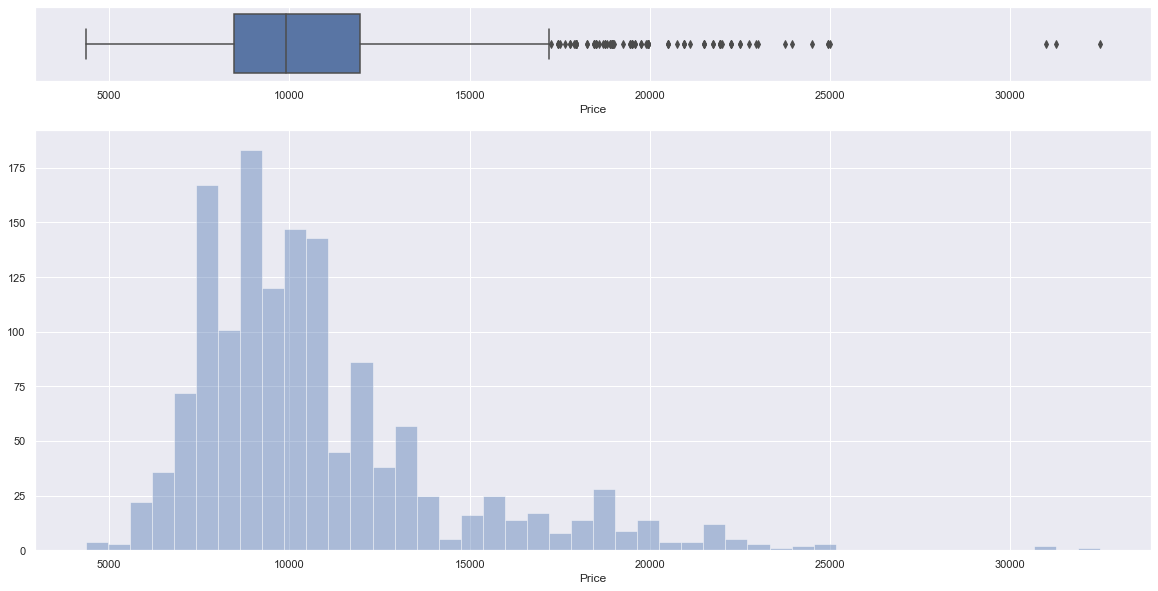

In [307]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(20,10)})

f, (ax_box, ax_hist) = plt.subplots(2, gridspec_kw={"height_ratios":(.15, .85)})

sns.boxplot(df["Price"], ax=ax_box)
sns.distplot(df["Price"], ax=ax_hist, kde=False)


## Pair plot

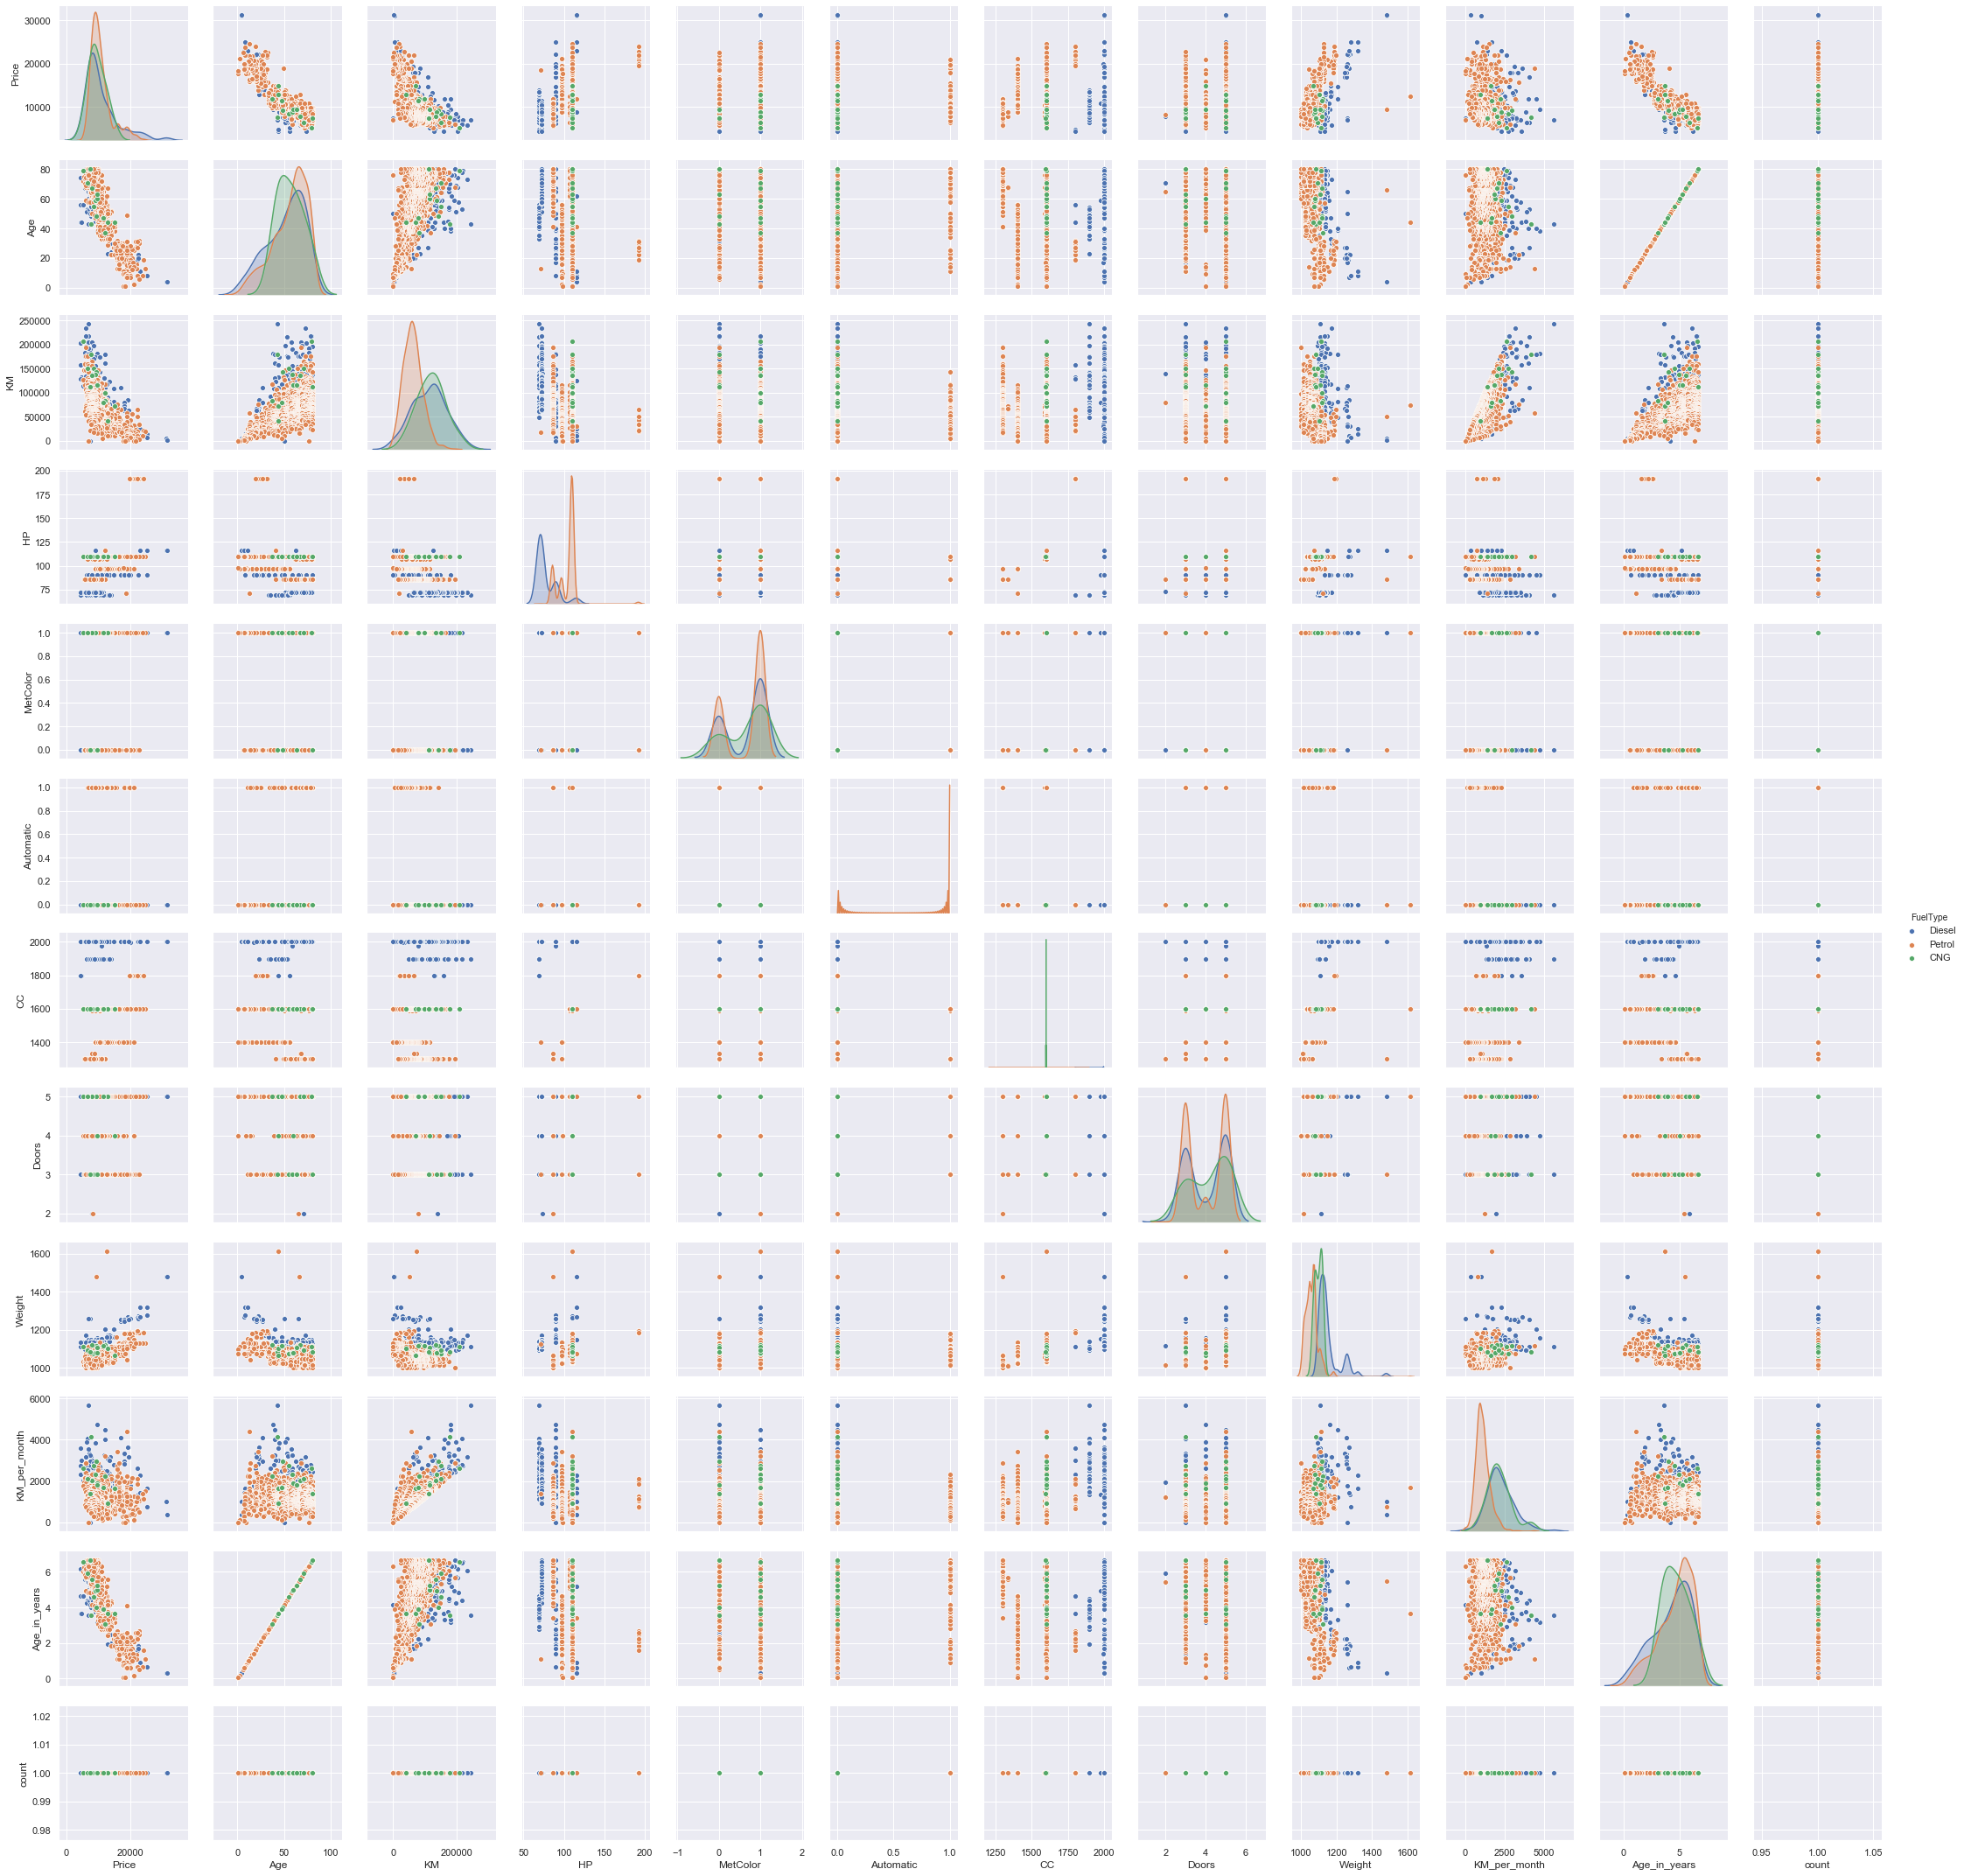

In [308]:
sns.pairplot(df, kind="scatter", hue="FuelType")

# Dealing with missing values

In [338]:
# .isna() and .isnull() both works
# Use the following line to delete the additional KM_per_month and Age_in_years columns
# df.drop(["KM_per_month", "Age_in_years"], axis=1, inplace=True)
df.isnull().sum()

Price            0
Age              0
KM               0
FuelType       100
HP               0
MetColor       150
Automatic        0
CC               0
Doors            0
Weight           0
Price_class      0
count            0
dtype: int64

## Total numbers of rows having Null values

In [317]:
total_null_rows = df[df.isnull().any(axis=1)]
len(total_null_rows)

340

## Two ways to fill the missing values

### 1) To use mean/median if its numerical variable
### 2) FIll it with the class with maximum count in case of the categorical variable

In [319]:
df.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,KM_per_month,Age_in_years,count
count,1436.000000,1336.000000,1421.000000,1430.000000,1286.000000,1436.000000,1436.000000,1436.000000,1436.00000,1321.000000,1336.000000,1436.0
mean,10730.824513,55.672156,68647.239972,101.478322,0.674961,0.055710,1566.827994,4.033426,1072.45961,1260.217457,4.639346,1.0
std,3626.964585,18.589804,37333.023589,14.768255,0.468572,0.229441,187.182436,0.952677,52.64112,638.188748,1.549150,0.0
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.00000,0.013158,0.083333,1.0
25%,8450.000000,43.000000,43210.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.00000,865.000000,3.583333,1.0
50%,9900.000000,60.000000,63634.000000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.00000,1135.762712,5.000000,1.0
75%,11950.000000,70.000000,87000.000000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.00000,1513.965517,5.833333,1.0
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.00000,5651.162791,6.666667,1.0


### Age, KM and HP has numeric values so we replace the NaN values with either Mean or Median(50%) ( We select the lower value among them because if we replace with the higher value it might create some outliers)

In [325]:
df["Age"].fillna(df["Age"].mean(), inplace=True)
df["Age"].isna().sum()

0

In [329]:
df["KM"].fillna(df["KM"].median(), inplace=True)
df["KM"].isna().sum()

0

In [330]:
df["HP"].fillna(df["HP"].mean(), inplace=True)
df["HP"].isna().sum()

0

In [343]:
df["FuelType"].value_counts()

Petrol    1177
Diesel     144
CNG         15
Name: FuelType, dtype: int64

In [344]:
df["FuelType"].fillna(df["FuelType"].value_counts().index[0], inplace=True)

In [348]:
df["MetColor"].fillna(df["MetColor"].value_counts().index[0], inplace=True)

In [349]:
df.isna().sum()

Price          0
Age            0
KM             0
FuelType       0
HP             0
MetColor       0
Automatic      0
CC             0
Doors          0
Weight         0
Price_class    0
count          0
dtype: int64

## Fill missing values in 1 line using lambda function

In [352]:
data_nan.isnull().sum()

Price          0
Age          100
KM            15
FuelType     100
HP             6
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

In [353]:
data_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 10 columns):
Price        1436 non-null int64
Age          1336 non-null float64
KM           1421 non-null float64
FuelType     1336 non-null object
HP           1430 non-null float64
MetColor     1286 non-null float64
Automatic    1436 non-null int64
CC           1436 non-null int64
Doors        1436 non-null object
Weight       1436 non-null int64
dtypes: float64(4), int64(4), object(2)
memory usage: 123.4+ KB


In [356]:
data_nan = data_nan.apply(lambda x:x.fillna(x.mean())
                         if x.dtype=='float'
                         else x.fillna(x.value_counts().index[0])) # can also use mode() instead of value_counts()

In [357]:
data_nan.isna().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64